In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Dalla Terra alla Luna

**Nel libro di Jule Verne "Dalle Terra alla Luna"...**

<center>
<img src="assets/moonshot.jpg" width=70%/>
</center>

* ...Il veicolo con i protagonisti viene "sparato" verso la Luna

## Esercizio: Dalla Terra alla Luna

**Durante il viaggio, la navicella è soggetta a forze gravitazionali**

Esse sono regolate dalla legge di gravitazione di Newton:

$$
F_{12} = -G \frac{m_1 m_2}{r_{12} \|r_{12}\|}
$$

* $F_{12}$ è la forza esercitata dal corpo 2 sul corpo 1
* $G$ è la costante di gravitazione
* $m_1$ ed $m_2$ sono le masse del corpo 1 e 2
* $r_{12}$ è la distanza dal corpo 1 al corpo 2, i.e.
$$
r_{12} = x_1 - x_2
$$
* $x_1$ e $x_2$ sono le posizioni (scalari) di 1 e 2 (la forma vettoriale è diversa)

## Esercizio: Dalla Terra alla Luna

**Si desidera modellare il moto della navicella**

* Assumiamo per semplicità che la Terra e la Luna siano in fisse
* Quindi la nave viaggerà lungo una traiettoria verticale
* Il moto sarà regolato dell'equazione differenziale:

$$
\ddot{x} = \frac{1}{m_s} (F_{se} + F_{sm})
$$

* $m_s$ è la massa della navicella
* $F_{se}$ è l'attrazione esercitata dalla Terra sulla navicella
* $F_{sm}$ è l'attrazione esercitata dalla Luna sulla navicella

## Esercizio: Dalla Terra alla Luna

**Nel complesso, il sistema è descritto dell'ODE**

$$
\left(\begin{array}{c}
\dot{x} \\
\dot{v}
\end{array}\right)
=
\left(\begin{array}{c}
v \\
\frac{1}{m_s} (F_{se} + F_{sm})
\end{array}\right)
$$

Con:

$$\begin{align}
& F_{se} = - G \frac{m_s m_e}{x |x|} \\
& F_{sm} = - G \frac{m_s m_m}{(x-D) |x-D|}
\end{align}$$

Dove $D$ è la distanza tra il centro della Terra e della Luna

## Esercizio: Dalla Terra alla Luna

**Prima di tutto, procediamo a caricare i dati del problema**

Potete farlo usando la cella seguente:

In [2]:
G = 6.67408e-11 # Costante di gravitazione universale
ME = 5.972e24 # Massa della Terra
MM = 7.34767309e22 # Massa della Luna
MS = 800 # Massa del "satellite"
D = 384400e3 # Distanza Terra-Luna

rE = 6371e3 # Raggio della Terra
rM = 1737e3 # Raggio della Luna
v0a = 11000
v0b = 11100

## Esercizio: Dalla Terra alla Luna

**Nel modulo `sol.moonshot` si definisca una classe:**

```python
class Dstate:
    def __init__(self, G, ME, MM, MS, D):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato $(r_E, v_{0,a}) = (6371e3, 11000)$ ed il tempo iniziale $t_0 = 0$

In [4]:
import numpy as np

X0 = np.array([rE, v0a])
t0 = 0

from sol2 import moonshot
f = moonshot.Dstate(G, ME, MM, MS, D)
print(f(X0, t0))

[ 1.10000000e+04 -9.81961542e+00]


## Esercizio: Dalla Terra alla Luna

**Nel modulo `sol.moonshot` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento della navicella:

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `base.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento della navicella**

* Per un periodo di 3.5 giorni
* ...A partire dallo stato iniziale $(r_E, v_{0,a}) = (6371e3, 11000)$

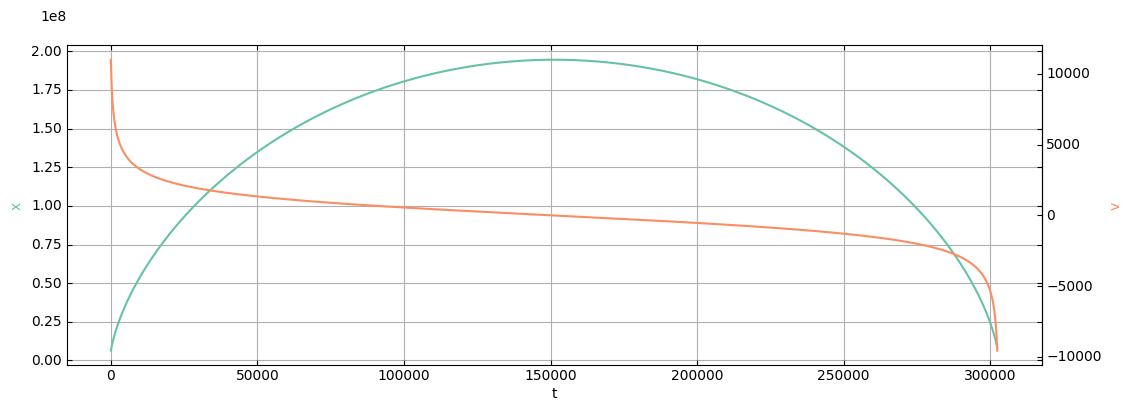

In [13]:
X0 = np.array([rE, v0a])
t = np.linspace(0, 3600 * 24 * 3.5, 3600 * 24 * 4)


from sol2 import moonshot
f = moonshot.Dstate(G, ME, MM, MS, D)
X1, t = moonshot.simulate(f, X0, t)

## Esercizio: Dalla Terra alla Luna

**Si utilizzi di nuovo `simulate` per simulare il comportamento della navicella**

* Per un periodo di 3.03 giorni
* ...A partire dallo stato iniziale $(r_E, v_{0,b}) = (6371e3, 11100)$

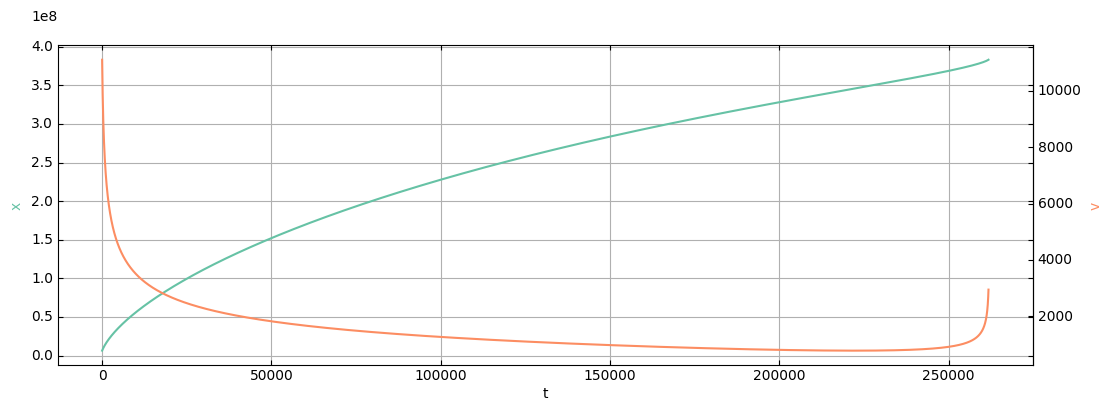

In [14]:
X0 = np.array([rE, v0b])
t2 = np.linspace(0, 3600 * 24 * 3.03, 3600 * 24 * 4)

X2, t = moonshot.simulate(f, X0, t2)

## Esercizio: Dalla Terra alla Luna

**Nel modulo `sol.moonshot` si definisca una funzione:**

```python
def goal_reached(X, D, rM)
```

* Che restituisca:
  - Il valore `True` se la quota massima raggiunta è superiore a $D - r_{M}$
  - Il valore `False` altrimenti

Si stampino a video il risultato per le due simulazione precedenti

In [15]:
print(moonshot.goal_reached(X1, D, rM))
print(moonshot.goal_reached(X2, D, rM))

False
True
